# TryAlgo Maps in Paris

Here is a demo of the *tryalgo* package over Paris' graph.  
We are going to display a shortest path from Gare de Lyon to Place d'Italie.

Let's first store the graph in an adjacency list.

In [2]:
with open('paris.txt') as f:
    lines = f.read().splitlines()
    N, M, T, C, S = map(int, lines[0].split())
    paris_coords = []
    for i in range(1, N + 1):
        paris_coords.append(list(map(float, lines[i].split())))  # Read coords
    paris = {node: {} for node in range(N)}
    for i in range(N + 1, N + M + 1):
        start, end, nb_directions, duration, length = map(int, lines[i].split())
        paris[start][end] = length
        if nb_directions == 2:
            paris[end][start] = length

How many nodes?

In [3]:
len(paris)

11348

In [4]:
paris[0]

{4942: 277, 1079: 113, 2912: 178}

Which means the node 0 leads to the node 1079 with cost 113 and so on.

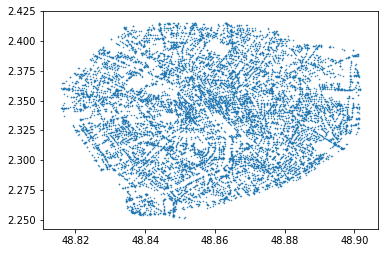

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt

x = [point[0] for point in paris_coords]
y = [point[1] for point in paris_coords]
plt.scatter(x, y, marker='.', s=1)

## Geolocation using geopy

In [6]:
from geopy.geocoders import Nominatim

geocoder = Nominatim(user_agent='tryalgo')
start = geocoder.geocode("Gare de Lyon, Paris")
end = geocoder.geocode("Porte d'Italie, Paris")
start.longitude, start.latitude

GeocoderTimedOut: Service timed out

We need a function that provides the index of the closest node in the graph of Paris. The distance between two pairs of latitude and longitude is given by the following `haversine` function:

In [8]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

def closest_node(coords, location):
    dmin = float('inf')
    closest = None
    for i in range(len(coords)):
        d = haversine(coords[i][1], coords[i][0], location.longitude, location.latitude)
        if d < dmin:
            closest = i
            dmin = d
    return closest

## Visualization using Folium

In [9]:
import folium
paris_viz = folium.Map(location=(48.8330293, 2.3618845), tiles='Stamen Watercolor', zoom_start=13)
paris_viz

## Pathfinding using tryalgo

In [10]:
from tryalgo.dijkstra import dijkstra

source = closest_node(paris_coords, start)
target = closest_node(paris_coords, end)
dist, prec = dijkstra(paris, paris, source, target)

# Let's build the path
path = [target]
node = target
while prec[node] is not None:
    node = prec[node]
    path.append(node)
print('Path found with', len(path), 'nodes:', path[::-1])

AttributeError: 'int' object has no attribute 'longitude'

To finish, let's display the path.

In [11]:
from folium.features import PolyLine
paris_viz.add_child(PolyLine(map(lambda node: paris_coords[node], path)))
paris_viz

NameError: name 'path' is not defined

In [10]:
# We can also save it to a file
# paris_viz.save('pathfinding_in_paris.html')
# from IPython.display import IFrame
# IFrame('pathfinding_in_paris.html', width='100%', height=510)

Did you like this demo? If so, please let us know on the GitHub project!
https://github.com/jilljenn/tryalgo